In [15]:
#Import libraries , read data frame , show and describe..

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


df = pd.read_csv('./survey-results-public.csv')

df.head()

df.describe()


,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


In [3]:
# I want to see row counts , I want to see column counts
df.shape


(51392, 154)

In [4]:
# drop all missing values 
onlyprof_country_jobseeking = df.dropna(subset=['Professional', 'Country','JobSeekingStatus'], how='any')
onlyprof_country_jobseeking

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
5,6,Student,"Yes, both",New Zealand,"Yes, full-time","Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Disagree,NaN,A bachelor's degree,White or of European descent,Disagree,Agree,Disagree,Agree,NaN,NaN
6,7,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Master's degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...",20 to 99 employees,...,Disagree,Male,A doctoral degree,White or of European descent,Disagree,Agree,Disagree,Agree,NaN,NaN
7,8,Professional developer,"Yes, both",Poland,No,Employed full-time,Master's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),Fewer than 10 employees,...,Somewhat agree,Male,A master's degree,White or of European descent,Agree,Somewhat agree,Disagree,Agree,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51385,51386,Used to be a professional developer,"Yes, both",United Kingdom,No,Employed full-time,Master's degree,A business discipline,A few days each month,"1,000 to 4,999 employees",...,Somewhat agree,Female,High school,White or of European descent,Somewhat agree,Strongly agree,Disagree,Strongly agree,NaN,NaN
51386,51387,Professional developer,"Yes, both",Romania,No,Employed full-time,Some college/university study without earning ...,Something else,It's complicated,100 to 499 employees,...,Somewhat agree,Male,High school,White or of European descent,Agree,Agree,Disagree,Somewhat agree,NaN,NaN
51387,51388,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,A social science,A few days each month,100 to 499 employees,...,Disagree,Male,A doctoral degree,East Asian; White or of European descent,Disagree,Agree,Strongly disagree,Strongly agree,58000.0,NaN
51390,51391,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,Computer science or software engineering,Never,Fewer than 10 employees,...,Disagree,Male,A bachelor's degree,White or of European descent,Disagree,Agree,Disagree,Strongly agree,40000.0,NaN


In [5]:
# first I need to find out missing values inside of 'Professional' if it is True that means we don't have missing values
#no_missing_values_cond=df['Professional'].isnull().sum()==0
#no_missing_values_cond

In [6]:
# I want to check 'Each Professional Counts'
status_professional=df['Professional'].value_counts()
status_professional

Professional developer                                  36131
Student                                                  8224
Professional non-developer who sometimes writes code     5140
Used to be a professional developer                       983
None of these                                             914
Name: Professional, dtype: int64

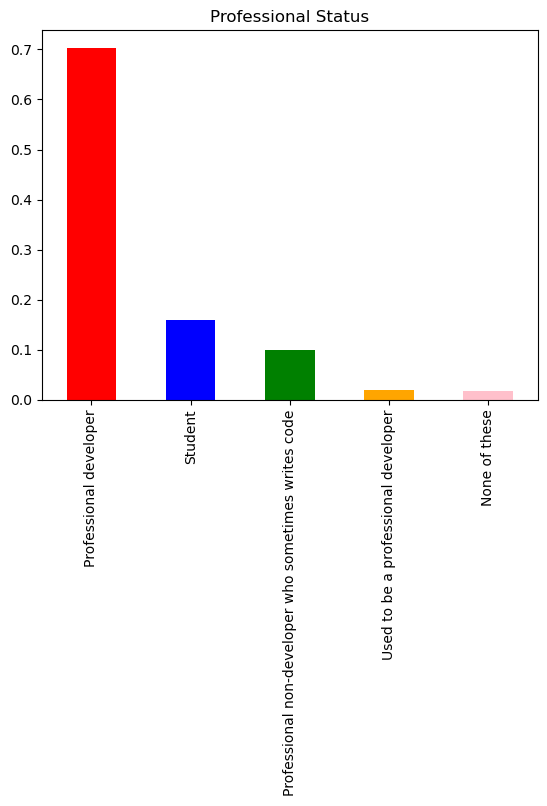

In [7]:
#it could be better if we see the 'Professionals in chart' 
colors = ['red', 'blue', 'green', 'orange','pink']
(status_professional/df.shape[0]).plot(kind="bar",color=colors);
plt.title("Professional Status");

In [9]:
#In which countries do professional developers tend to change jobs more?
professional_devs = onlyprof_country_jobseeking[onlyprof_country_jobseeking["Professional"] == "Professional developer"]
professional_devs

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
7,8,Professional developer,"Yes, both",Poland,No,Employed full-time,Master's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),Fewer than 10 employees,...,Somewhat agree,Male,A master's degree,White or of European descent,Agree,Somewhat agree,Disagree,Agree,NaN,NaN
8,9,Professional developer,"Yes, I program as a hobby",Colombia,"Yes, part-time",Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","5,000 to 9,999 employees",...,Strongly disagree,Male,A bachelor's degree,Hispanic or Latino/Latina,Somewhat agree,Strongly agree,Disagree,Strongly agree,NaN,NaN
9,10,Professional developer,"Yes, I program as a hobby",France,"Yes, full-time","Independent contractor, freelancer, or self-em...",Master's degree,Computer science or software engineering,It's complicated,NaN,...,Disagree,Male,A doctoral degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,NaN,NaN
13,14,Professional developer,"Yes, both",Germany,No,Employed full-time,Some college/university study without earning ...,Computer science or software engineering,"Less than half the time, but at least one day ...",Fewer than 10 employees,...,Disagree,Female,A master's degree,Hispanic or Latino/Latina,Somewhat agree,Agree,Disagree,Strongly agree,NaN,NaN
15,16,Professional developer,"Yes, I program as a hobby",United States,"Yes, part-time","Independent contractor, freelancer, or self-em...",Primary/elementary school,NaN,All or almost all the time (I'm full-time remote),NaN,...,Disagree,Male,A doctoral degree,White or of European descent,Disagree,Somewhat agree,Strongly disagree,Agree,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51383,51384,Professional developer,"Yes, I program as a hobby",Sweden,No,"Independent contractor, freelancer, or self-em...",I never completed any formal education,NaN,All or almost all the time (I'm full-time remote),NaN,...,Strongly disagree,Male,"Some college/university study, no bachelor's d...",White or of European descent,Agree,Somewhat agree,Strongly disagree,Disagree,NaN,NaN
51384,51385,Professional developer,No,United States,No,Employed full-time,Bachelor's degree,Computer programming or Web development,Never,20 to 99 employees,...,Disagree,Male,A master's degree,White or of European descent,Somewhat agree,Agree,Disagree,Somewhat agree,NaN,NaN
51386,51387,Professional developer,"Yes, both",Romania,No,Employed full-time,Some college/university study without earning ...,Something else,It's complicated,100 to 499 employees,...,Somewhat agree,Male,High school,White or of European descent,Agree,Agree,Disagree,Somewhat agree,NaN,NaN
51387,51388,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,A social science,A few days each month,100 to 499 employees,...,Disagree,Male,A doctoral degree,East Asian; White or of European descent,Disagree,Agree,Strongly disagree,Strongly agree,58000.0,NaN


In [9]:
# do we have nulls for country, Yes and we deleted them for counting normally
#country_fixed = professional_devs.dropna(subset=['Country'], axis=0)# dataframe with rows for nan Country removed
#null_country=country_fixed['Country'].isnull().sum()
#null_country  # we don't have missing values of dataframe now


In [11]:
#professional_devs_cat=professional_devs['Country','JobSeekingStatus']#.value_counts()
professional_devs_cat = professional_devs[['Country', 'JobSeekingStatus']].copy()
professional_devs_cat

,Country,JobSeekingStatus
7,Poland,"I'm not actively looking, but I am open to new..."
8,Colombia,I am not interested in new job opportunities
9,France,"I'm not actively looking, but I am open to new..."
13,Germany,I am actively looking for a job
15,United States,"I'm not actively looking, but I am open to new..."
...,...,...
51383,Sweden,"I'm not actively looking, but I am open to new..."
51384,United States,"I'm not actively looking, but I am open to new..."
51386,Romania,"I'm not actively looking, but I am open to new..."
51387,United States,I am actively looking for a job


In [8]:
#status_Country=professional_devs['Country'].value_counts()
#status_Country
status_Country=professional_devs_cat.value_counts()
status_Country

Country                         JobSeekingStatus                                            
United States                   I'm not actively looking, but I am open to new opportunities    3500
                                I am not interested in new job opportunities                    1739
United Kingdom                  I'm not actively looking, but I am open to new opportunities    1322
India                           I'm not actively looking, but I am open to new opportunities    1262
Germany                         I'm not actively looking, but I am open to new opportunities    1074
                                                                                                ... 
Gabon                           I'm not actively looking, but I am open to new opportunities       1
Georgia                         I am actively looking for a job                                    1
Rwanda                          I am not interested in new job opportunities                       

In [9]:
# tamamı iş arama seçeneğini doldurmuş ve ülke bilgisi girilmiş olan olan profesyonel developerların sayısı  
total=0
for col in (status_Country):
    total+=col
    
print(total)

24028


In [10]:
lean_status = professional_devs_cat[professional_devs_cat['JobSeekingStatus'] == 'I am actively looking for a job']
lean_status

,Country,JobSeekingStatus
13,Germany,I am actively looking for a job
57,Italy,I am actively looking for a job
66,India,I am actively looking for a job
70,United States,I am actively looking for a job
83,United States,I am actively looking for a job
...,...,...
51356,Portugal,I am actively looking for a job
51368,Taiwan,I am actively looking for a job
51373,United States,I am actively looking for a job
51382,France,I am actively looking for a job


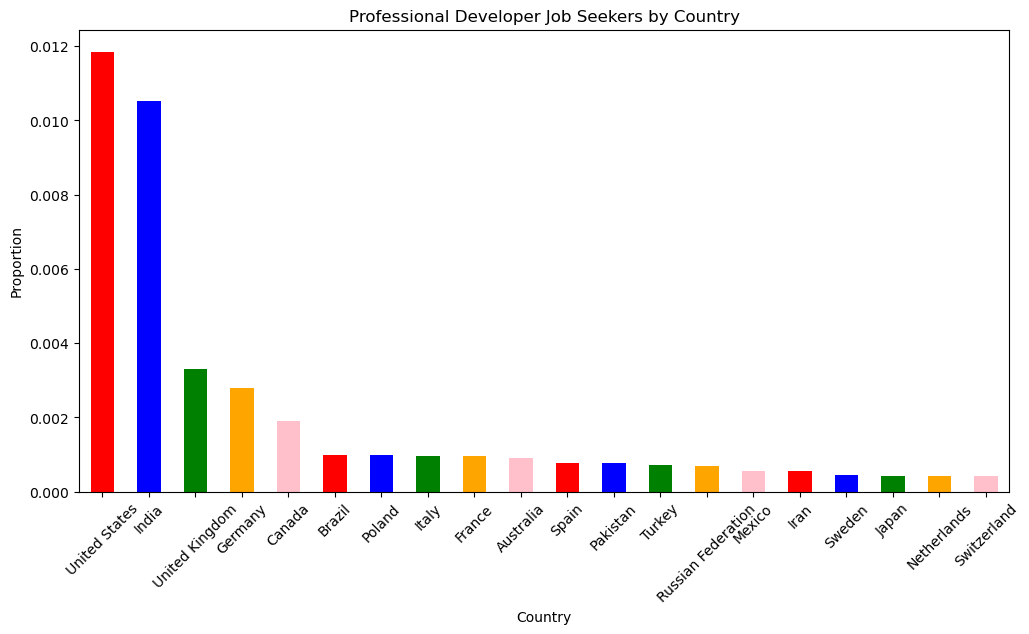

In [14]:
country_counts = lean_status['Country'].value_counts()

range_by_country=(country_counts[:20]/df.shape[0])

plt.figure(figsize=(12, 6))
(country_counts[:20]/df.shape[0]).plot(kind='bar',color=colors)
plt.xlabel('Country')
plt.ylabel('Proportion')
plt.title('Professional Developer Job Seekers by Country')
plt.xticks(rotation=45)
plt.show()

In [11]:
# Professional Developer sayılarının ülkelere göre dağılımı ? 
professional_counts = professional_devs['Country'].value_counts()

range_prof_by_country=(professional_counts[:20]/df.shape[0])

plt.figure(figsize=(12, 6))
(professional_counts[:20]/df.shape[0]).plot(kind='bar',color=colors)
plt.xlabel('Country')
plt.ylabel('Proportion')
plt.title('Professional Developer by Country')
plt.xticks(rotation=45)
plt.show()

NameError: name 'colors' is not defined

<Figure size 1200x600 with 0 Axes>

In [16]:
comp_df = pd.merge(range_prof_by_country, range_by_country, left_index=True, right_index=True)
comp_df.columns = ['Professional_Developer', 'Profes_Dev_ActiveJobSeekers']
comp_df['Range'] = comp_df['Profes_Dev_ActiveJobSeekers'] / comp_df['Professional_Developer']
comp_df.style.bar(subset=['Range'], align='mid', color=['#d65f5f', '#5fba7d'])

,Professional_Developer,Profes_Dev_ActiveJobSeekers,Range
United States,0.113792,0.011850,0.104138
United Kingdom,0.043684,0.003308,0.075724
India,0.039442,0.010507,0.266404
Germany,0.035258,0.002802,0.079470
Canada,0.022066,0.001907,0.086420
France,0.015489,0.000953,0.061558
Poland,0.011870,0.000973,0.081967
Australia,0.008503,0.000915,0.107551
Spain,0.008406,0.000778,0.092593
Russian Federation,0.008211,0.000681,0.082938


In [12]:
#second question
#null karakterleri çıkaralım
dropna_language=df.dropna(subset=['HaveWorkedLanguage'])



In [13]:
#second question 
from collections import defaultdict

def count_programming_languages(dataframe, column_name):
    combined_list = []
    
    for row in dataframe[column_name]:
        combined_list.extend(row.split(";"))
    
    programming_languages = defaultdict(int)
    
    for language in combined_list:
        programming_languages[language.strip()] += 1
    
    return programming_languages

result = count_programming_languages(dropna_language, 'HaveWorkedLanguage')

for language, count in result.items():
    print(language, ":", count)


Swift : 2368
JavaScript : 22875
Python : 11704
Ruby : 3324
SQL : 18754
Java : 14524
PHP : 10290
Matlab : 1569
R : 1634
Rust : 416
CoffeeScript : 1192
Clojure : 391
Elixir : 380
Erlang : 281
Haskell : 649
C# : 12476
Objective-C : 2349
C : 6974
C++ : 8155
Assembly : 1823
VB.NET : 2273
Perl : 1585
Scala : 1309
F# : 457
TypeScript : 3488
Lua : 1039
VBA : 1574
Groovy : 1193
Go : 1557
Smalltalk : 327
Visual Basic 6 : 1071
Common Lisp : 273
Dart : 145
Julia : 138
Hack : 107


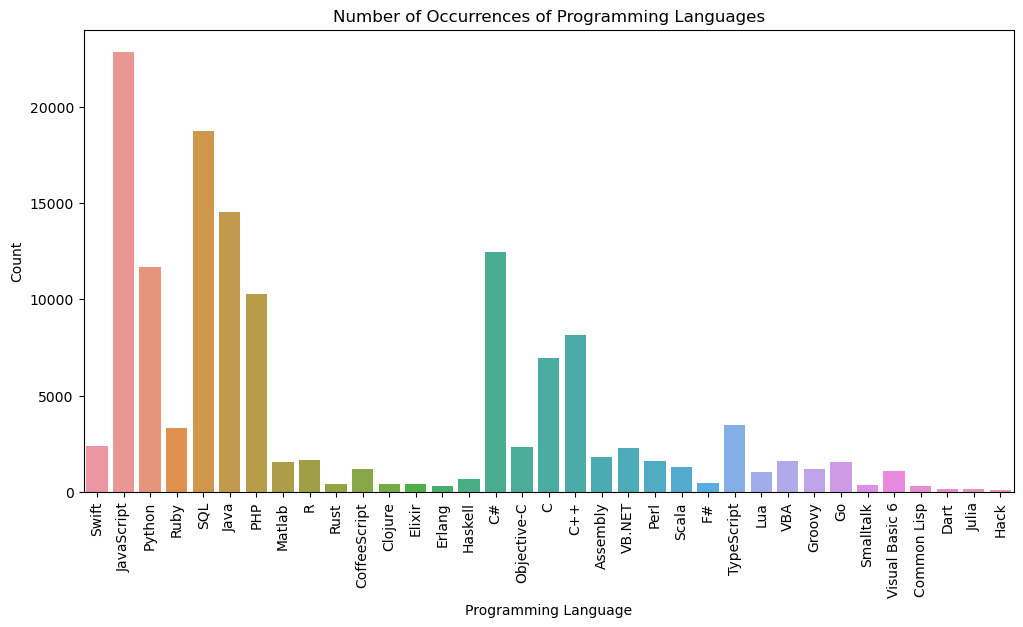

In [14]:
# Sözlük verilerini DataFrame'e dönüştürme
data = {'Programming Language': list(result.keys()), 'Count': list(result.values())}
df_plot = pd.DataFrame(data)

# Histogram çizimi
plt.figure(figsize=(12, 6))
sns.barplot(x='Programming Language', y='Count', data=df_plot)
plt.xticks(rotation=90)
plt.xlabel('Programming Language')
plt.ylabel('Count')
plt.title('Number of Occurrences of Programming Languages')
plt.show()

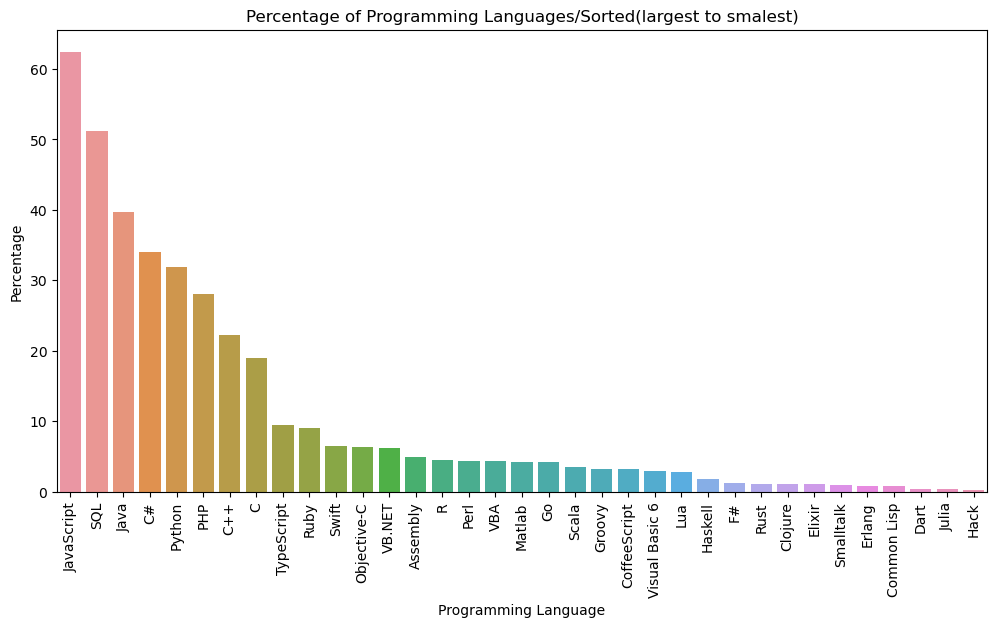

In [15]:
# percentage calculation:
total_count = dropna_language['HaveWorkedLanguage'].shape[0]
df_plot['Percentage'] = df_plot['Count'] / total_count * 100
df_plot = df_plot.sort_values(by='Count', ascending=False)

# Graphic drawing : 
plt.figure(figsize=(12, 6))
sns.barplot(x='Programming Language', y='Percentage', data=df_plot)
plt.xticks(rotation=90)
plt.xlabel('Programming Language')
plt.ylabel('Percentage')
plt.title('Percentage of Programming Languages/Sorted(largest to smalest)')
plt.show()


In [6]:
#Null değerleri silme

dropna_salary=df.dropna(subset=['Salary'])


In [7]:
# Salary and HaveWorkedLanguage remove null values
Language_salaries = dropna_salary[['Salary', 'HaveWorkedLanguage']]
Language_salaries = Language_salaries.dropna(subset=['HaveWorkedLanguage'])
Language_salaries

,Salary,HaveWorkedLanguage
2,113750.000000,Java; PHP; Python
14,100000.000000,Assembly; C; C++
17,130000.000000,C; Clojure; JavaScript; Matlab; Rust; SQL; Swift
22,100764.000000,Java
25,175000.000000,Java; Scala
...,...,...
51371,74193.548387,Go; JavaScript; Python
51378,107526.881720,JavaScript; Objective-C; Python; Swift
51382,32258.064516,C#; JavaScript; TypeScript
51387,58000.000000,C#; JavaScript; Python; SQL; VB.NET; VBA


In [8]:
# we will look the first letter of comments for salaries : 


# İlk elemanı alacak fonksiyonu tanımlayalım
def get_first_element(text):
    elements = text.split(";")
    if len(elements) > 0:
        first_element = elements[0].strip()
        return first_element
    else:
        return ""

# HaveWorkedLanguage sütununa fonksiyonu uygulayalım ve sütunu güncelleyelim
Language_salaries['HaveWorkedLanguage'] = Language_salaries['HaveWorkedLanguage'].apply(get_first_element)

# Güncellenmiş DataFrame'i yazdıralım
print(Language_salaries)

              Salary HaveWorkedLanguage
2      113750.000000               Java
14     100000.000000           Assembly
17     130000.000000                  C
22     100764.000000               Java
25     175000.000000               Java
...              ...                ...
51371   74193.548387                 Go
51378  107526.881720         JavaScript
51382   32258.064516                 C#
51387   58000.000000                 C#
51390   40000.000000         JavaScript

[12128 rows x 2 columns]


In [9]:
#max salary : 
# Programlama dillerine göre maximum hesapla
max_salary = Language_salaries.groupby('HaveWorkedLanguage')['Salary'].max().sort_values(ascending=False)
max_salary

HaveWorkedLanguage
Java              197000.0
C#                195000.0
Python            195000.0
C                 195000.0
JavaScript        195000.0
C++               194000.0
F#                193750.0
CoffeeScript      190000.0
Assembly          180000.0
Clojure           180000.0
Ruby              180000.0
Objective-C       180000.0
Erlang            180000.0
Groovy            180000.0
Go                175000.0
Scala             174000.0
Smalltalk         160000.0
Swift             160000.0
Haskell           160000.0
SQL               156000.0
Perl              150000.0
Elixir            145000.0
Hack              140000.0
PHP               140000.0
Matlab            135000.0
VBA               135000.0
Lua               131000.0
Common Lisp       130000.0
Rust              130000.0
Julia             120000.0
R                 120000.0
Dart              115000.0
Visual Basic 6     97000.0
VB.NET             67000.0
Name: Salary, dtype: float64

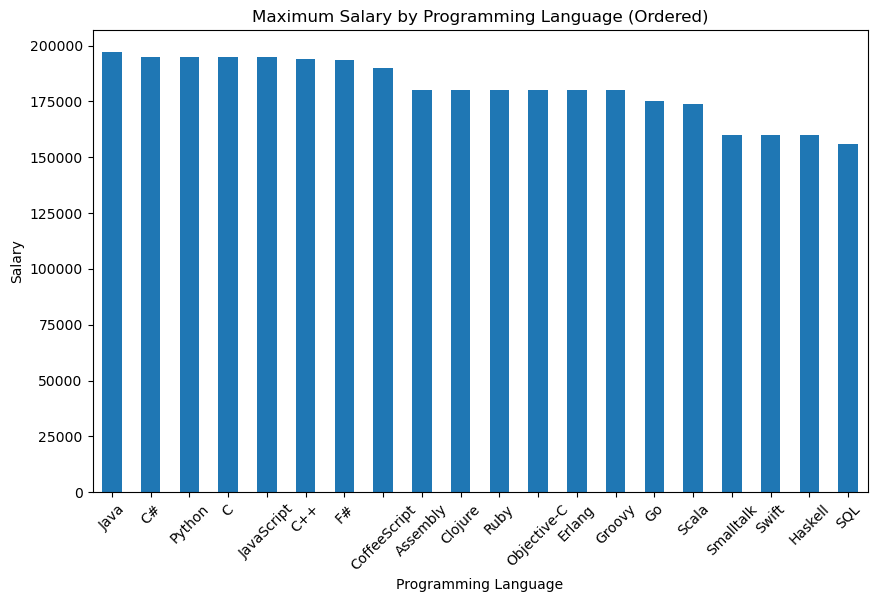

In [10]:
# max. graphic 

plt.figure(figsize=(10, 6))
max_salary[:20].plot(kind='bar')
plt.xlabel('Programming Language')
plt.ylabel('Salary')
plt.title('Maximum Salary by Programming Language (Ordered)')
plt.xticks(rotation=45)
plt.show()



In [11]:
#average salary : 
# Programlama dillerine göre maaş ortalamasını hesapla
avg_salary = Language_salaries.groupby('HaveWorkedLanguage').mean()['Salary'].sort_values(ascending=False)
avg_salary

HaveWorkedLanguage
Visual Basic 6    97000.000000
Smalltalk         89801.039932
Rust              81489.084392
Scala             81413.239848
Common Lisp       80984.779170
VBA               77659.434992
Clojure           77431.707353
Go                72182.654379
Hack              71163.215928
Lua               68038.123167
Groovy            64094.061880
CoffeeScript      63958.133671
Perl              62975.385551
R                 62455.023261
Python            62211.033762
F#                61361.721401
C++               61129.890746
Ruby              60739.968880
SQL               60150.401203
C#                59264.896879
Julia             57054.035067
C                 56491.637603
Erlang            56483.252973
Assembly          54449.536221
Haskell           54229.970399
Elixir            53121.392329
Java              53034.495132
VB.NET            52854.838710
Dart              52691.504150
JavaScript        51768.093188
Objective-C       51396.205486
Swift             50

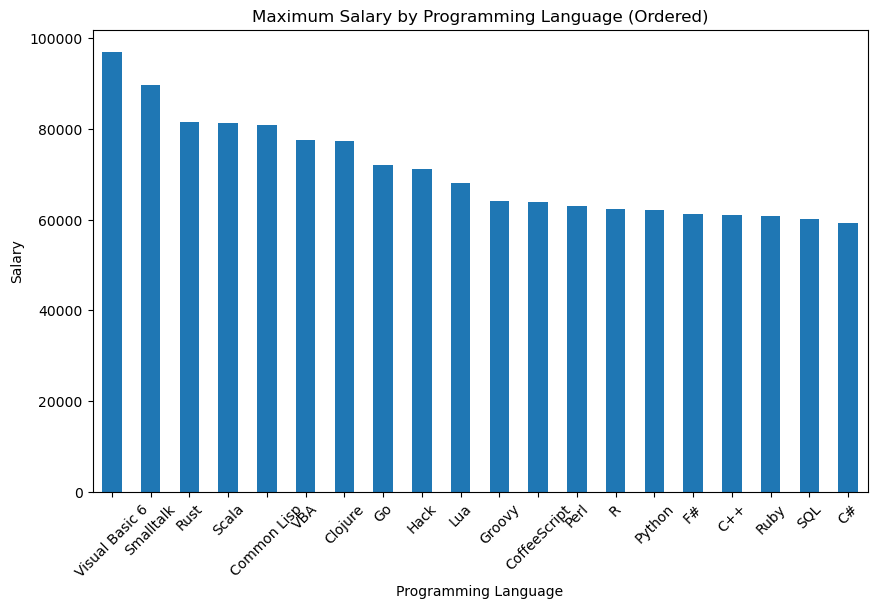

In [13]:
# average graphic 
#total_count = dropna_language['HaveWorkedLanguage'].shape[0]
#avg_lang = Language_salaries



plt.figure(figsize=(10, 6))
avg_salary[:20].plot(kind='bar')
plt.xlabel('Programming Language')
plt.ylabel('Salary')
plt.title('Average Salary by Programming Language (Ordered)')
plt.xticks(rotation=45)
plt.show()



In [ ]:
# company size - Language :
# alt kümelere ayır ve nulları kaldır.
company_languages = df[['HaveWorkedLanguage', 'CompanySize']].dropna()
company_languages

In [ ]:
# company size 'a göre verilen cevapları gruplandır'
cat_company=company_languages.value_counts()


In [ ]:
# call function :
company_languages['HaveWorkedLanguage'] = company_languages['HaveWorkedLanguage'].apply(get_first_element)
company_languages

In [ ]:
# group by :
#group_company=company_languages.groupby('CompanySize').mean()['HaveWorkedLanguage']
group_company = company_languages.groupby('CompanySize')['HaveWorkedLanguage'].value_counts()
group_company



In [ ]:
empk_to_emp5k = company_languages[company_languages['CompanySize'] == '1,000 to 4,999 employees']
#empk_to_emp5k

empk_to_emp5k=empk_to_emp5k['HaveWorkedLanguage']
num_of_1_4 = empk_to_emp5k.value_counts()
num_of_1_4

In [ ]:
# graphical : 



plt.figure(figsize=(10, 6))
num_of_1_4.plot(kind='bar')
plt.xlabel('Programming Language')
plt.ylabel('Count')
plt.title('1,000 to 4,999 employees')
plt.xticks(rotation=45)
plt.show()




In [ ]:
emp10k_to_more = company_languages[company_languages['CompanySize'] == '10,000 or more employees']


emp10k_to_more=emp10k_to_more['HaveWorkedLanguage']
num_of_10 = emp10k_to_more.value_counts()
num_of_10

In [ ]:
# graphical : 

plt.figure(figsize=(10, 6))
num_of_10.plot(kind='bar')
plt.xlabel('Programming Language')
plt.ylabel('Count')
plt.title('10,000 or more employees')
plt.xticks(rotation=45)
plt.show()